<center><h1>DSCI 552 Machine Learning for Data Science HW4</h1></center>
<br>
<center> <font size="4">Name:Chung Ming Wu</font></center>

<center> USC_ID:7703568593</center>
    
<center> Github_Username:andywu96 </center>

## 1. Time Series Classication Part 1: Feature Creation/Extraction　
An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import pandas as pd

def get_merged_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)

path1 = '../data/AReM/bending1'
fmask1 = os.path.join(path1, '*dataset*.csv')

path2 = '../data/AReM/bending2'
fmask2 = os.path.join(path2, '*dataset*.csv')

path3 = '../data/AReM/cycling'
fmask3 = os.path.join(path3, '*dataset*.csv')

path4 = '../data/AReM/lying'
fmask4 = os.path.join(path4, '*dataset*.csv')

path5 = '../data/AReM/sitting'
fmask5 = os.path.join(path5, '*dataset*.csv')

path6 = '../data/AReM/standing'
fmask6 = os.path.join(path6, '*dataset*.csv')

path7 = '../data/AReM/walking'
fmask7 = os.path.join(path7, '*dataset*.csv')

df_bending1 = get_merged_csv(glob.glob(fmask1), header = 4, usecols = [0,1,2,3,4,5,6] )
df_bending2 = get_merged_csv(glob.glob(fmask2), header = 4, usecols = [0,1,2,3,4,5,6] )
df_cycling = get_merged_csv(glob.glob(fmask3), header = 4, usecols = [0,1,2,3,4,5,6] )
df_lying = get_merged_csv(glob.glob(fmask4), header = 4, usecols = [0,1,2,3,4,5,6] )
df_sitting = get_merged_csv(glob.glob(fmask5), header = 4, usecols = [0,1,2,3,4,5,6] )
df_standing = get_merged_csv(glob.glob(fmask6), header = 4, usecols = [0,1,2,3,4,5,6] )
df_walking = get_merged_csv(glob.glob(fmask7), header = 4, usecols = [0,1,2,3,4,5,6] )

In [2]:
test_set = pd.concat([df_bending1[0:960], df_bending2[0:960], df_cycling[:480] ,df_cycling[3360:4320],
                      df_lying[:480] ,df_lying[3360:4320], df_sitting[:480] ,df_sitting[3360:4320],
                      df_standing[:480] ,df_standing[3360:4320], df_walking[:480] ,df_walking[3360:4320]],axis=0)

train_set = pd.concat([df_bending1[960:], df_bending2[960:], df_cycling[480:3360] ,df_cycling[4320:],
                       df_lying[480:3360] ,df_lying[4320:],df_sitting[480:3360] ,df_sitting[4320:],
                       df_standing[480:3360] ,df_standing[4320:],df_walking[480:3360] ,df_walking[4320:]],axis=0)

In [3]:
import math

# Use for dataframe columns 
feature = ["min", "max" , "mean", "median", "std", "1st_quart", "3st_quart"]
Z = []

for i in range(1,7):
    for f in feature:
        Z.append(f+"_"+str(i))


# A function to transform dataframe into features
def get_feature(df):
    K = int(round(len(df)/480 + 1))
    df1 = df.copy()
    A = []
    
    # Use for dataframe features 
    for i in range(1,K):
        df1_1 = df1.iloc[(i-1)*480:i*480,:]
        df1_1 = df1_1.drop(columns = ['# Columns: time'], axis=0)
        df1_1 = df1_1.describe()
        df1_1 = df1_1.T
        df1_1 = df1_1.drop(columns = ['count'], axis=0)
        df1_1 = df1_1[["min", "max", "mean","50%","std","25%","75%"]]
        df1_1 = df1_1.rename(columns={'std': ' standard deviation','25%': ' first_quartiles',
                                  '50%': ' median','75%': ' third_quartiles'})
        A.append(df1_1.values.tolist())

        next 
    
    # Use for dataframe columns 
    
    A = np.array(A)
    A = A.reshape(int(len(df)/480),42)
    A = pd.DataFrame(A, columns = Z)
    
    
    return A

### (c)-(iv).  Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

I will select **Min, Mean, and Max**, because we can further use those features to get the ranges of each type of activities. Then, we can use **Range and Mean** to identify it belongs to which type of activities in the classification problem. 

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

## (a) Binary Classification Using Logistic Regression 

### (a)-(i) Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [4]:
# create label for dataframe to distinguish bending vs. other activities

i = ['bending']
j = ['other_activities']
s = i*9 + j*60
train_set_data = get_feature(train_set)
train_set_data['label'] = s
train_data_1 = train_set_data[['min_1','max_1','mean_1','min_2','max_2','mean_2','min_6','max_6','mean_6','label']]
train_data_1

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_6,max_6,mean_6,label
0,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,bending
1,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,bending
2,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,bending
3,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,bending
4,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555313,bending
...,...,...,...,...,...,...,...,...,...,...
64,20.75,46.25,34.763333,0.0,12.68,4.223792,0.0,9.39,3.288271,other_activities
65,21.50,51.00,34.935813,0.0,12.21,4.115750,0.0,10.21,3.280021,other_activities
66,18.33,47.67,34.333042,0.0,12.48,4.396958,0.0,8.01,3.261583,other_activities
67,18.33,45.75,34.599875,0.0,15.37,4.398833,0.0,8.86,3.289542,other_activities


C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


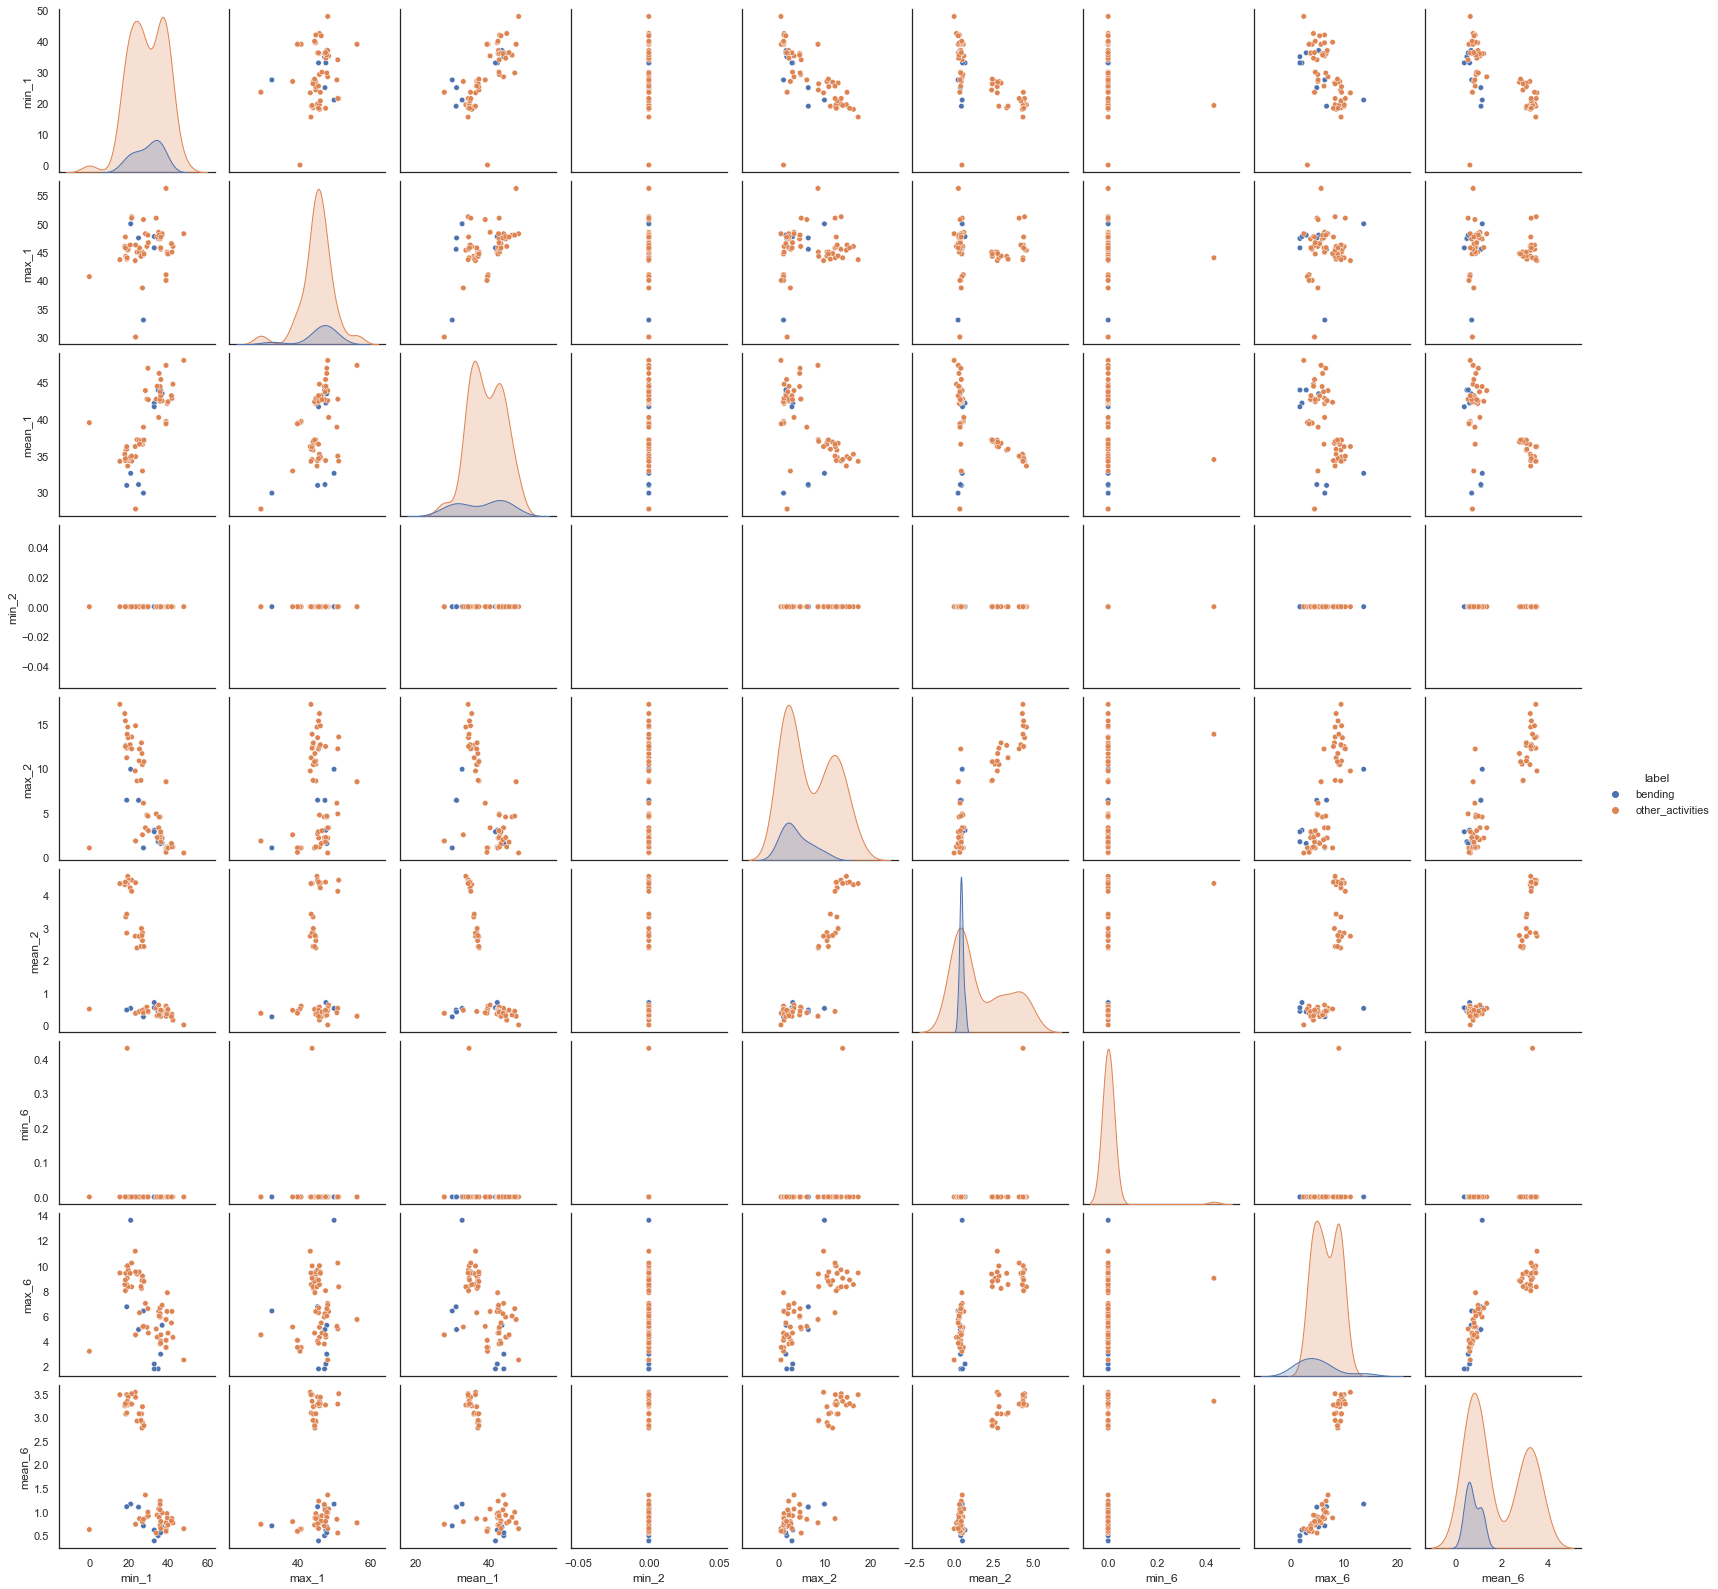

In [5]:
#draw the scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white") 
sns.pairplot(train_data_1,  diag_kind = 'kde', plot_kws=dict(s=30), hue = 'label')
plt.show()

### (a)-(ii) Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

In [6]:
# A function to transform dataframe and break each time series

def get_feature_break(df, n):
    # let n = times of break
    
    s = int(480/n)   
    p = 480 % n     # get the residual
    K = int(round(len(df)/480*n)+1)
    df1 = df.copy()
    df1 = df1.reset_index(drop=True)
    A = []
    
    # remove number of residual rows in each instance to get the equal length time series.
    if p != 0:
        for i in range(s+1):
            df1= df1.drop(labels= range(i*480, i*480+p),axis=0)
            
    # Use for dataframe features 
    for i in range(1,K):      
        df1_1 = df1.iloc[(i-1)*s:i*s,:] 
        df1_1 = df1_1.drop(columns = ['# Columns: time'], axis=0)
        df1_1 = df1_1.describe()
        df1_1 = df1_1.T
        df1_1 = df1_1.drop(columns = ['count'], axis=0)
        df1_1 = df1_1[["min", "max", "mean","50%","std","25%","75%"]]
        df1_1 = df1_1.rename(columns={'std': ' standard deviation','25%': ' first_quartiles',
                                  '50%': ' median','75%': ' third_quartiles'})
        A.append(df1_1.values.tolist())

        next 
    
    # reshape array and transform into dataframe
    A = np.array(A)
    A = A.reshape(int(len(df)/480*n),42)
    
    feature = ["min", "max" , "mean", "median", "std", "1st_quart", "3st_quart"]
    Z = []
    for i in range(1,7):
        for f in feature:
            Z.append(f+"_"+str(i))
    A = pd.DataFrame(A, columns = Z)
    
    # select features 1,2 and 6
    A = A[['min_1','max_1','mean_1','min_2','max_2','mean_2','min_6','max_6','mean_6']]
    
    # add label column for dataframe 
    i = ['bending']
    j = ['other_activities']
    w = i*9*n + j*60*n
    A['label'] = w
    
    return A

In [7]:
# define a function to separate features
def separate_feature(df):

    new_df_1  = pd.DataFrame()

    for V in range(9):
        new_feature_A = []
        new_feature_B = []

        for x in range(len(df)):
            if x % 2  == 0:
                new_feature_A.append((df.iloc[x,V]))
            else:
                new_feature_B.append((df.iloc[x,V]))  

        new_df= pd.DataFrame([new_feature_A, new_feature_B])
        new_df = new_df
        new_df_1 = pd.concat([new_df_1 , new_df ],axis=0, ignore_index = True)    
        
    return new_df_1.T

In [8]:
# build the columns names
column_name = ['min_1','max_1','mean_1','min_2','max_2','mean_2','min_6','max_6','mean_6']
Z = []
for f in column_name:
    for i in range(1,3):
        Z.append(f+"_"+str(i))

# Run function to get new df
new_f1 = get_feature_break(train_set, 2) 
new_df2 = separate_feature(new_f1)
new_df2.columns = Z
order = ['min_1_1','max_1_1','mean_1_1','min_2_1','max_2_1','mean_2_1','min_6_1','max_6_1','mean_6_1',
         'min_1_2','max_1_2','mean_1_2','min_2_2','max_2_2','mean_2_2','min_6_2','max_6_2','mean_6_2']
new_df2 = new_df2[order]

b = ['bending']
d = ['other_activities']
s_1 = b*9 + d*60
new_df2['label'] = s_1

C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andy2\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


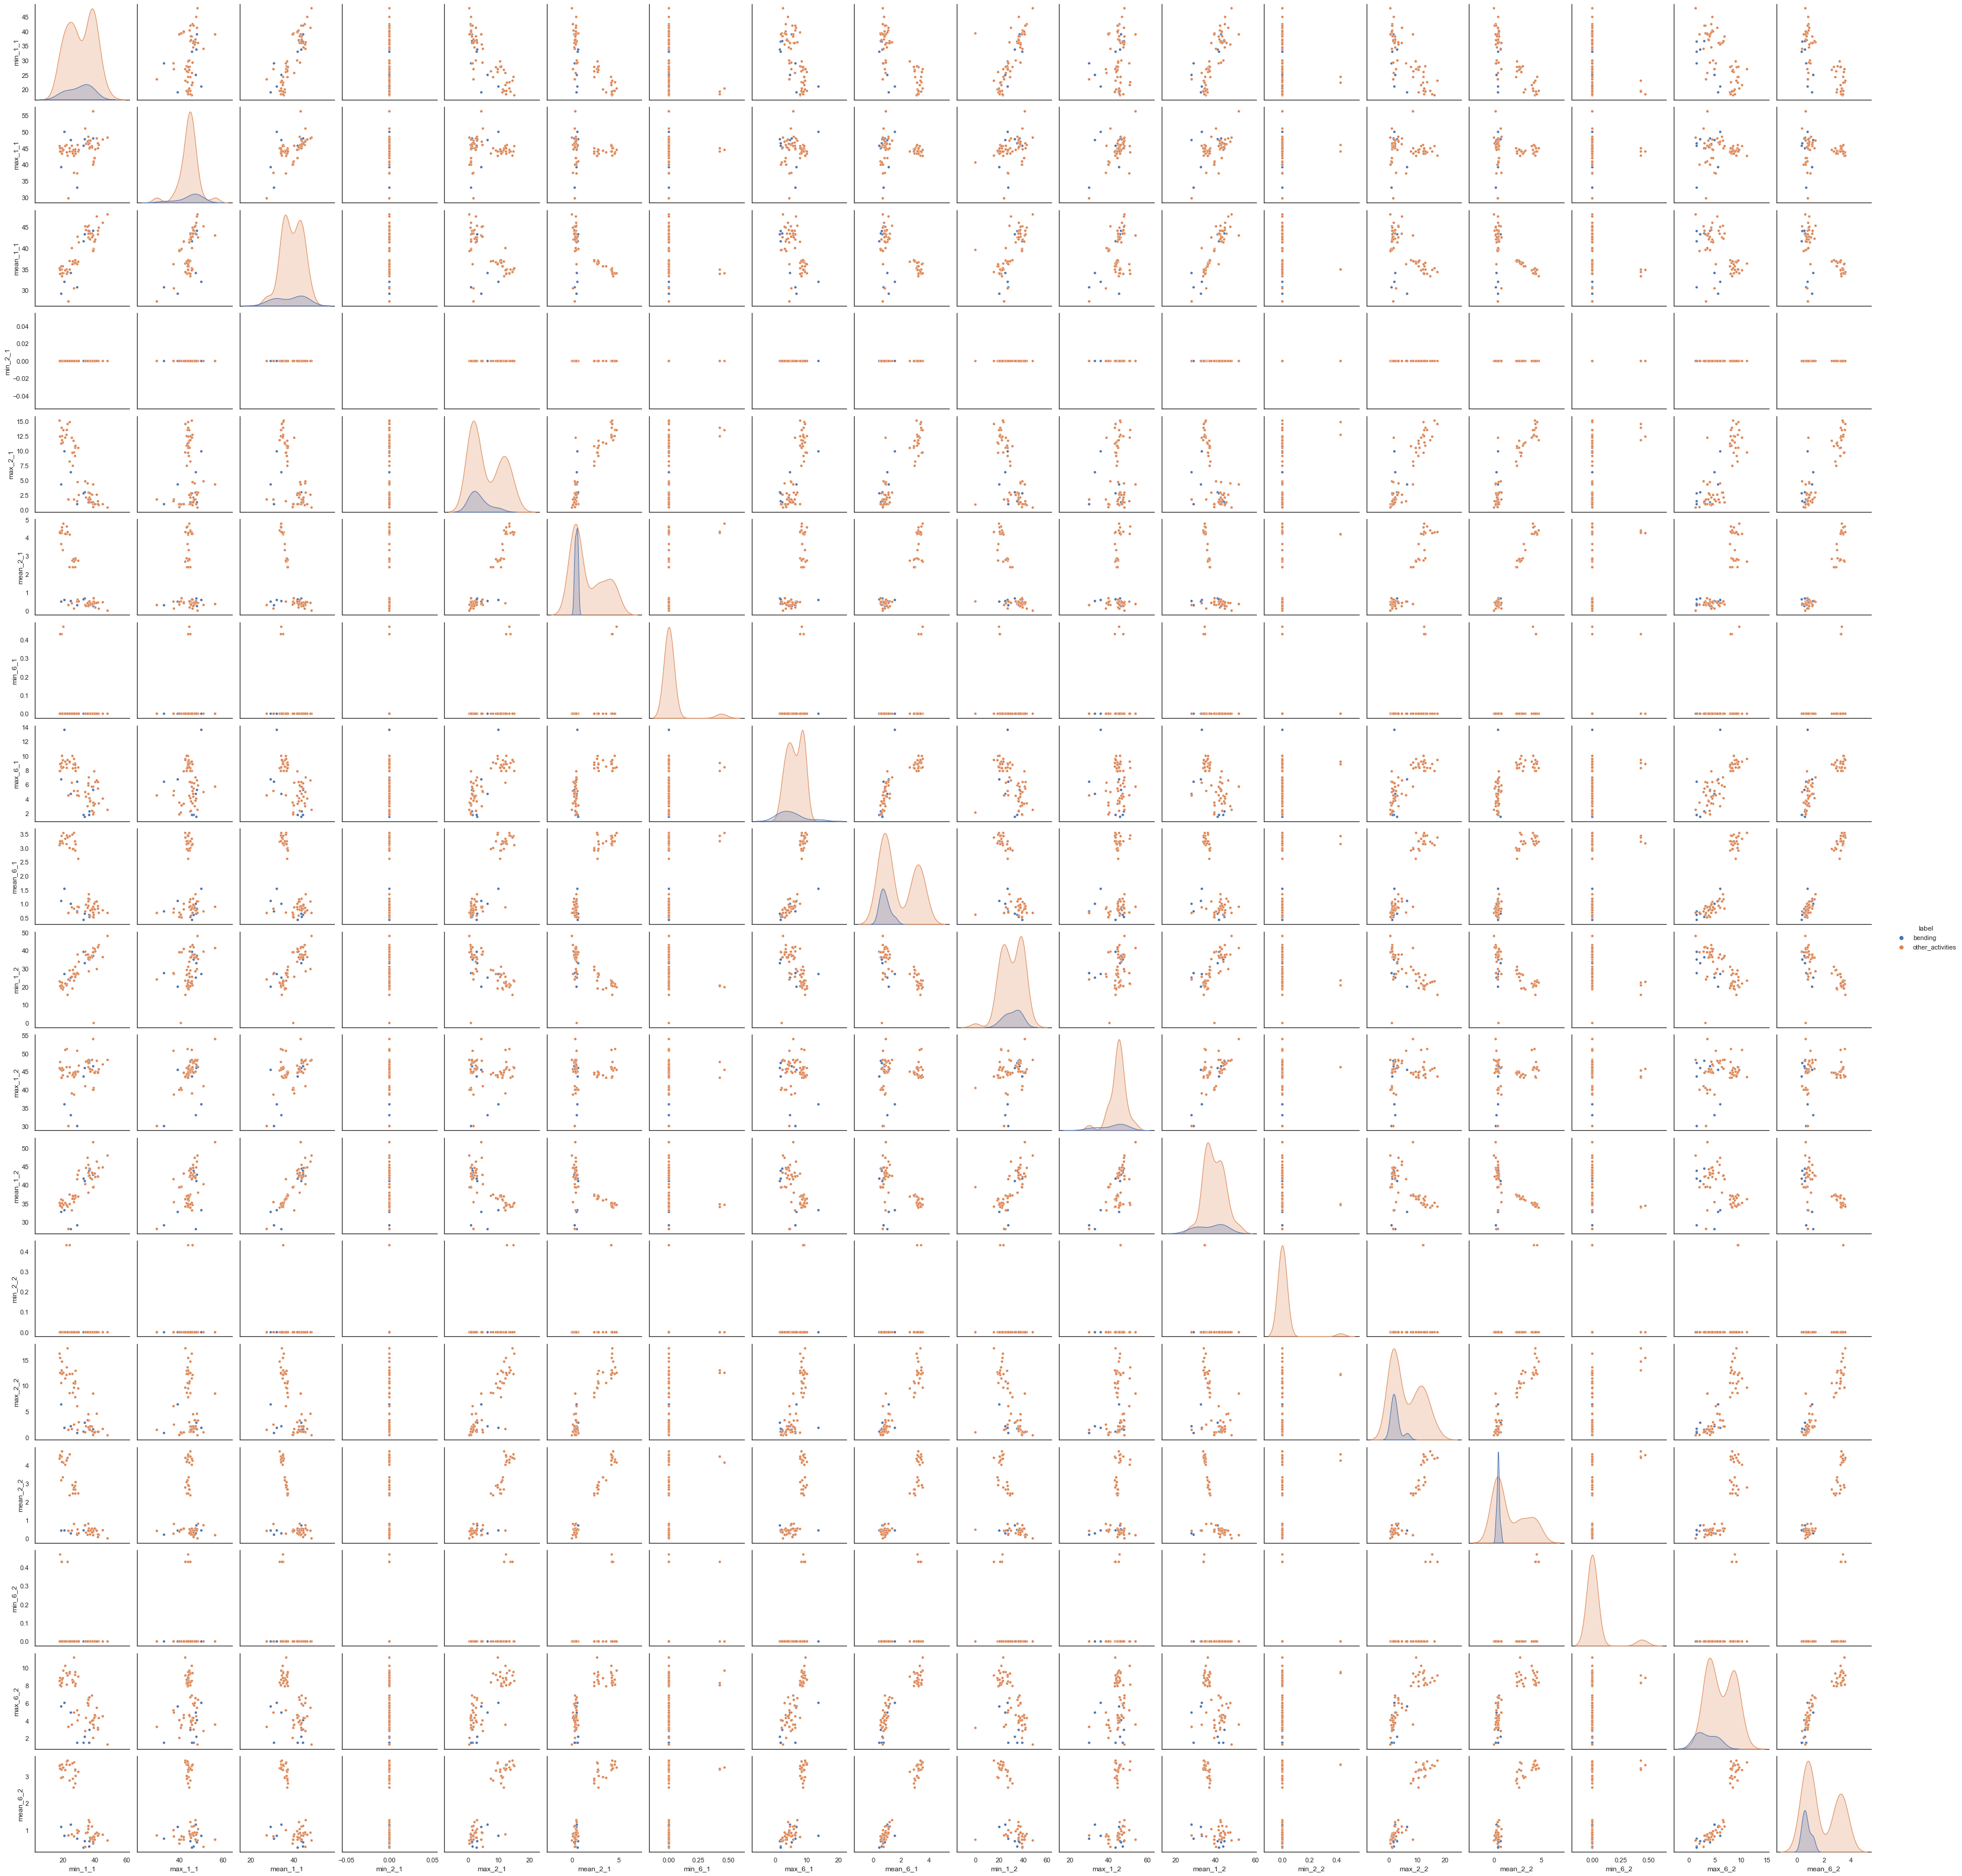

In [9]:
#draw the scatterplot
sns.set_theme(style="white") 
sns.pairplot(new_df2, plot_kws=dict(s=20), hue = 'label', diag_kind = 'kde')
plt.show()

**No, I can't find any considerable difference in the results compared with 2(a)-(i) 9*9 pairwise scatter plots**

### (a)-(iii) Break each time series in your training set into l = { 1; 2; : : : ; 20}  time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l; p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

**Create a function to Break each time series in the training set**

In [10]:
# A function to transform dataframe and break each time series

def get_feature_break_1(df, n):

    # let n = times of break
    s = int(480/n)   
    p = 480 % n     # get the residual
    K = int(round(len(df)/480*n)+1)
    df1 = df.copy()
    df1 = df1.reset_index(drop=True)
    A = []

        # remove number of residual rows in each instance to get the equal length time series.
    if p != 0:
        for i in range(s+1):
            df1= df1.drop(labels= range(i*480, i*480+p),axis=0)

    # select features min, max, and mean
    for i in range(1,K):      
        df1_1 = df1.iloc[(i-1)*s:i*s,:] 
        df1_1 = df1_1.drop(columns = ['# Columns: time'], axis=0)
        df1_1 = df1_1.describe()
        df1_1 = df1_1.T
        df1_1 = df1_1.drop(columns = ['count'], axis=0)
        df1_1 = df1_1[["min", "max" , "mean"]]
        A.append(df1_1.values.tolist())

        # reshape array and transform into dataframe
    A = np.array(A)
    A = A.reshape(int(len(df)/480*n),18)


    feature = ["min", "max" , "mean"]
    Z = []
    for i in range(1,7):
        for f in feature:
            Z.append(f+"_"+str(i))
    A = pd.DataFrame(A, columns = Z)


    # Break into features
    new_df_5  = pd.DataFrame()

    column_name = A.columns.values.tolist()
    E = []
    for i in range(1,n+1):
        for f in column_name:
            E.append(f+"_feature_"+str(i))

    for i in range(1,n+1):
        C = pd.concat([A.iloc[9*(i-1):9*(i),] ,A.iloc[9*(n)+60*(i-1):9*(n)+ 60*(i),]],ignore_index=True)
        new_df_5 = pd.concat([new_df_5, C],axis=1,ignore_index=True)    

    new_df_5.columns = E

    # add label column for dataframe 
    i = ['bending']
    j = ['other_activities']
    w = 9*i + 60*j
    new_df_5['label'] = w
    
    return new_df_5

**Recursive Feature Elimination using RFECV model**

In [11]:
# Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

n_feature_p= []
Mean_Score = []
features_used = []

for l in range(1,21):
    
    # load the datasets
    dataset = get_feature_break_1(train_set, l)

    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression(max_iter = 10000, C = float('inf'))

    # create the RFECV model 
    RFECV_1 = RFECV(estimator =  model,  cv = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 24)
                    ,scoring = 'accuracy')
    X = dataset.iloc[: , :-1]
    y = dataset.label
    RFECV_1 = RFECV_1.fit(X,y)
    
    # summarize the selection of the attributes
    n_feature_p.append(RFECV_1.n_features_)
    features_used.append(RFECV_1.get_feature_names_out())
    Mean_Score.append(RFECV_1.cv_results_['mean_test_score'].mean())

In [12]:
l = list(range(1,21))
result_table = pd.DataFrame(list(zip(l, n_feature_p,features_used, Mean_Score)), columns=['l', 'p', 'feature_name','Mean_Accuracy_scores'])
result_table

,l,p,feature_name,Mean_Accuracy_scores
0,1,6,"[mean_1_feature_1, max_2_feature_1, mean_3_fea...",0.950000
1,2,6,"[min_5_feature_1, mean_5_feature_1, max_6_feat...",0.997619
2,3,1,[min_5_feature_1],0.999471
3,4,2,"[min_5_feature_1, max_1_feature_4]",0.999802
4,5,1,[min_5_feature_1],1.000000
5,6,1,[min_5_feature_1],1.000000
6,7,1,[min_5_feature_1],1.000000
7,8,1,[min_5_feature_1],1.000000
8,9,1,[min_5_feature_1],1.000000
9,10,1,[min_5_feature_2],1.000000


**Best [l,p] pair**

In this case, I select l = 6, p = 1, and we can get the Mean_Accuracy_scores = 1

**Explain the right way and the wrong way are to perform cross-validation in this problem**

The wrong way to perform Cross-Validation is CV after fitting model, that would split only the X without Y. Hence, we should put the estimator into RFECV first, then fitting the X and Y to the model.

**The Reasons why using StratifiedKFold**

The classes (bending and non-bending) are not well separated. So, when we use K-fold Cross Validation, there is a possiblity that some folds may not get any samples from the minority class. So, to solve this problem, Stratified K-fold Cross Validation has been used to take care of class imbalance. Also, Stratified K-fold Cross Validation has reduced the instability in calculating the logistic regression parameters.

### (a)-(iv)  Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression Bi's as well as the p-values associated with them.

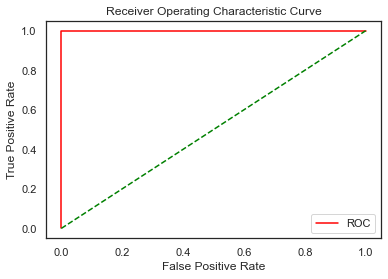

AUC_score for Logistic Regression:  1.0


In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# using 6 break, because Mean_Accuracy_scores is 1 
# load the datasets and label-encoding y 
dataset2 = get_feature_break_1(train_set, 6)
LE=LabelEncoder().fit(dataset2['label'])
dataset2['label']=LE.transform(dataset2['label'])

X2 = dataset2.iloc[: , :-1]
y2 = dataset2.label

# fit a model
model2 = LogisticRegression(solver='lbfgs', max_iter = 10000, C = float('inf'))
model2.fit(X2, y2)

# predict probabilities
y_hat = model2.predict_proba(X2)[:,1]
y_label = model2.predict(X2)

# calculate scores
f_pos, t_pos, thresholds = roc_curve(y2, y_hat)


#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)  
print('AUC_score for Logistic Regression: ', roc_auc_score(y2, y_hat))

In [14]:
# Confusion Matrix
# label 0 = bending 
# label 1 = other_activities
pd.crosstab(y2,y_label)

col_0,0,1
label,,
0,9,0
1,0,60


In [15]:
# Fit the best [l,p] pair into logistics regression

import statsmodels.formula.api as smf
logic_model =  smf.logit('label ~ min_5_feature_1 ', data=dataset2).fit(method='BFGS')
logic_model.summary()

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       67
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                   1.000
Time:                        01:45:42   Log-Likelihood:            -0.00018785
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.673e-13
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.2795    186.893      0.151      0.880    -338.024     394.583
min_5_feature_1    -1.3375     10.172     -0.131      0.895     -21.274      18.598
===================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

**The parameters of logistic regression Bi's and the p-values are as above**

### (a)-(v)  Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [16]:
# A little revised for test set to break the time series

def get_feature_break_2(df, n):
    
    # let n = times of break

    s = int(480/n)   
    p = 480 % n     # get the residual
    K = int(round(len(df)/480*n)+1)
    df1 = df.copy()
    df1 = df1.reset_index(drop=True)
    A = []
    
    # remove number of residual rows in each instance to get the equal length time series.
    if p != 0:
        for i in range(s+1):
            df1= df1.drop(labels= range(i*480, i*480+p),axis=0)
            
    # select features min, max, and mean
    for i in range(1,K):      
        df1_1 = df1.iloc[(i-1)*s:i*s,:] 
        df1_1 = df1_1.drop(columns = ['# Columns: time'], axis=0)
        df1_1 = df1_1.describe()
        df1_1 = df1_1.T
        df1_1 = df1_1.drop(columns = ['count'], axis=0)
        df1_1 = df1_1[["min", "max", "mean"]]
        A.append(df1_1.values.tolist())
    
    # reshape array and transform into dataframe
    A = np.array(A)
    A = A.reshape(int(len(df)/480*n),18)
    
    feature = ["min", "max" , "mean"]
    Z = []
    for i in range(1,7):
        for f in feature:
            Z.append(f+"_"+str(i))
    A = pd.DataFrame(A, columns = Z)
    
    
    # Break into features
    new_df_5  = pd.DataFrame()
    column_name = A.columns.values.tolist()
    E = []
    for i in range(1,n+1):
        for f in column_name:
            E.append(f+"_feature_"+str(i))
        
    for i in range(1,n+1):
        C = pd.concat([A.iloc[4*(i-1):4*(i),] ,A.iloc[4*(n)+15*(i-1):4*(n)+ 15*(i),]],ignore_index=True)
        new_df_5 = pd.concat([new_df_5, C],axis=1,ignore_index=True)    
                   
    new_df_5.columns = E
    
    # add label column for dataframe 
    i = ['bending']
    j = ['other_activities']
    w = 4*i + 15*j
    new_df_5['label'] = w
    
    return new_df_5

In [17]:
# load the datasets and label-encoding y 
dataset3 = get_feature_break_2(test_set, 2)
LE=LabelEncoder().fit(dataset3['label'])
dataset3['label']=LE.transform(dataset3['label'])

X3 = dataset3.iloc[: , :-1]
y3 = dataset3.label

# fit a model
model2.fit(X3, y3)

# predict probabilities
y_hat1 = model2.predict_proba(X3)[:,1]
y_label1 = model2.predict(X3)

print('AUC_score for Logistic Regression: ', roc_auc_score(y3, y_hat1))
pd.crosstab(y3,y_label1)


AUC_score for Logistic Regression:  1.0


col_0,0,1
label,,
0,4,0
1,0,15


**Both Accuracy scores are 1 in both train set and test set**

### (a)-(vi)  Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

**Yes**, because both AUC is equal to 1, it represents that classes seem to be well-separated to cause instability in calculating logistic regression parameters. Also, as present in (a)-(iv) smf's result: 
**Complete Separation: The results show that there iscomplete separation. In this case the Maximum Likelihood Estimator does not exist and the parameters are not identified.**

### (a)-(vii)  From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

**Yes, there exists some imbalanced classes, because in the train set only 9 out of 69 are "bending", which only represent around 13% of the train set. The class distribution is not uniform among the classes.**

In [18]:
# import SMOTE oversampling and other necessary libraries 

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

X4 = dataset2.iloc[: , :-1]
y4 = dataset2.label


# summarize class distribution
print("Before oversampling: ",Counter(y4))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X4, y4)

# summarize class distribution
print("After oversampling: ",Counter(y_SMOTE))

# fit a model
model3 = LogisticRegression(solver='lbfgs', max_iter = 10000, C = float('inf'))
clf_SMOTE = model3.fit(X_SMOTE, y_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_SMOTE)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_SMOTE, pred_SMOTE))

# confusion matrix of test set 
pd.crosstab(y_SMOTE, pred_SMOTE)

Before oversampling:  Counter({1: 60, 0: 9})
After oversampling:  Counter({0: 60, 1: 60})
ROC AUC score for oversampled SMOTE data:  1.0


col_0,0,1
label,,
0,60,0
1,0,60


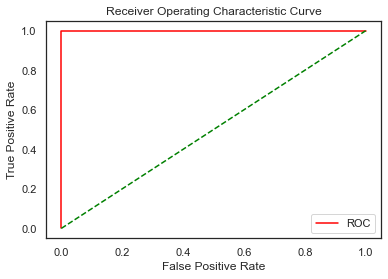

In [19]:
# plot ROC
f_pos_1, t_pos_1, thresholds_1 = roc_curve(y_SMOTE, pred_SMOTE)
plot_roc_curve(f_pos_1, t_pos_1)  

## (b) Binary Classification Using L1-penalized logistic regression

### (b)-(i)  Repeat 2(a)iii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and lambda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for lambda automatically.

**Using LogisticRegressionCV**

In [20]:
# import scaler 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

l1penalty = []
accuracy = []
AUC      = []

for l in range(1,21):  
    # load the datasets
    dataset4 = get_feature_break_1(train_set, l)
    LE=LabelEncoder().fit(dataset4['label'])
    dataset4['label']=LE.transform(dataset4['label'])

    # Fit regularized logistic regression
    L1LogRegModel  = LogisticRegressionCV (Cs = 100, penalty = 'l1', solver = 'liblinear', max_iter = 10000, 
                                           cv = StratifiedKFold(n_splits = 5,shuffle=True, random_state=24)
                                           ,scoring = 'accuracy' )
    X5 = dataset4.iloc[: , :-1]
    scaler.fit(X5)
    X_scale = scaler.transform(X5)
    y5 = dataset4.label

    L1LogRegModel = L1LogRegModel.fit(X_scale,y5)
    
    # summarize the selection of the attributes
    penalty = L1LogRegModel.C_[0]
    l1penalty.append(penalty)
    
    L1Accuracy = L1LogRegModel.scores_[1].mean(axis=0).max()
    accuracy.append(L1Accuracy)
   
    # predict probabilities
    y_hat2 = L1LogRegModel.predict_proba(X_scale)[:,1]
    L1AUC = roc_auc_score(y5, y_hat2)
    AUC.append(L1AUC)


In [21]:
l = list(range(1,21))
result_table = pd.DataFrame(list(zip(l, l1penalty , accuracy, AUC)), 
                            columns=['l', 'Best_C','Accuracy_scores', 'AUC_scores'])
result_table

,l,Best_C,Accuracy_scores,AUC_scores
0,1,200.923300,0.957143,1.0
1,2,21.544347,1.000000,1.0
2,3,65.793322,1.000000,1.0
3,4,0.521401,1.000000,1.0
4,5,0.432876,1.000000,1.0
5,6,0.432876,1.000000,1.0
6,7,0.432876,1.000000,1.0
7,8,0.521401,1.000000,1.0
8,9,0.521401,1.000000,1.0
9,10,0.628029,1.000000,1.0


**select l = 5, C = 0.432876 we can get Accuracy_scores = 1 as the best solution**

### (b)-(ii)  Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

On average, the accuracy scores for L1-penalised Logistic Regression model is much better than Logistic Regression with variable selection. The L-1 penalized Logistic Regression model is easier to implement because we just have to add one regularization parameter. Besides, the variable selection using RFECV is recursively repeated on the pruned set until the desired number of features to select is eventually reached, which is not easy to implement and spend lots of time. **Hence, L1-penalised Logistic Regression model performs better for this dataset.**

## (C) Multi-class Classication (The Realistic Case)

### (C)-(i)  Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [22]:
# Create a function to label train set all activities

def label_train(df):
    label_1 = ['bending1']
    label_2 = ['bending2']
    label_3 = ['cycling']
    label_4 = ['lying']
    label_5 = ['sitting']
    label_6 = ['standing']
    label_7 = ['walking']
    lab = 5*label_1 + 4*label_2+ 12*label_3 +12*label_4 +12*label_5 +12*label_6 +12*label_7 
    df['label'] = lab
    
    return df

In [23]:
scaler = MinMaxScaler()

Multil1penalty = []
Multiaccuracy = []

for l in range(1,21):  
    # load the datasets
    dataset5 = get_feature_break_1(train_set, l)
    dataset5 = label_train(dataset5)
    
    # Label Encoding
    LE=LabelEncoder().fit(dataset5['label'])
    dataset5['label']=LE.transform(dataset5['label'])

    # Data Scaling
    X6 = dataset5.iloc[: , :-1]
    scaler.fit(X6)
    X_scale_1 = scaler.transform(X6)
    y6 = dataset5.label
    
    # Fit regularized logistic regression
    MultiL1Model  = LogisticRegressionCV (Cs = 100, penalty = 'l1', solver = 'saga', max_iter = 10000, 
                                           cv = StratifiedKFold(n_splits = 4),
                                          multi_class='multinomial',scoring = 'accuracy')
    
    MultiL1Model = MultiL1Model.fit(X_scale_1,y6)
    
    # summarize the selection of the attributes
    Mult_penalty = MultiL1Model.C_[0]
    Multil1penalty.append(Mult_penalty)
    
    MutiLiAccuracy = MultiL1Model.scores_[1].mean(axis=0).max()
    Multiaccuracy.append(MutiLiAccuracy)

In [24]:
l = list(range(1,21))
result_table_1 = pd.DataFrame(list(zip(l, Multil1penalty ,Multiaccuracy)), 
                               columns=['l', 'Best_C','Accuracy_scores'])
result_table_1

,l,Best_C,Accuracy_scores
0,1,2.782559,0.911765
1,2,7.054802,0.827614
2,3,1.592283,0.769608
3,4,200.923300,0.784314
4,5,2.310130,0.670752
5,6,1.097499,0.840686
6,7,3.351603,0.839869
7,8,1072.267222,0.842320
8,9,4.862602,0.812908
9,10,613.590727,0.669118


**select l = 12, C =12.328467 , Accuracy_Scores = 0.942810 as the best train model to run test set**

In [25]:
# Create a function to label train set all activities

def label_test(df):
    label_1 = ['bending1']
    label_2 = ['bending2']
    label_3 = ['cycling']
    label_4 = ['lying']
    label_5 = ['sitting']
    label_6 = ['standing']
    label_7 = ['walking']
    lab = 2*label_1 + 2*label_2+ 3*label_3 +3*label_4 +3*label_5 +3*label_6 +3*label_7 
    df['label'] = lab
    
    return df

In [26]:
# load the datasets and label-encoding y 
dataset6 = get_feature_break_2(test_set, 16)
dataset6 = label_test(dataset6)
LE=LabelEncoder().fit(dataset6['label'])
dataset6['label']=LE.transform(dataset6['label'])

# Data Scaling
X7 = dataset6.iloc[: , :-1]
scaler.fit(X7)
X_scale_test = scaler.transform(X7)
y7 = dataset6.label
    
# Fit regularized logistic regression
MultiL1Model_best  = LogisticRegression(C = 21.544347 , penalty = 'l1', solver = 'saga', max_iter = 10000,
                                      multi_class='multinomial')

MultiL1Model_best = MultiL1Model_best.fit(X_scale_test,y7)

# predict probabilities
y_hat2 = MultiL1Model_best.predict_proba(X_scale_test)
y_label2 = MultiL1Model_best.predict(X_scale_test)

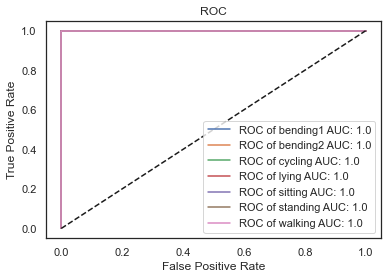

In [27]:
fpr = {}
tpr = {}
multiclassAUC = {}

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_label2))[:,i], y_hat2[:,i])
    multiclassAUC[i] = roc_auc_score(np.array(pd.get_dummies(y_label2))[:,i], y_hat2[:,i])

    
label_name = ['bending1','bending2','cycling','lying','sitting','standing','walking']

for i in range(7):
    className = label_name[i]
    label = 'ROC of ' + className + ' AUC: ' + str(multiclassAUC[i])
    plt.plot(fpr[i], tpr[i], label=label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()


In [28]:
pd.crosstab(y7,y_label2)

col_0,0,1,2,3,4,5,6
label,,,,,,,
0,2,0,0,0,0,0,0
1,0,2,0,0,0,0,0
2,0,0,3,0,0,0,0
3,0,0,0,3,0,0,0
4,0,0,0,0,3,0,0
5,0,0,0,0,0,3,0
6,0,0,0,0,0,0,3


**The Test error is 0**

### (C)-(ii)  Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.Repeat 2(c)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

### Multi-Class Classification using MultinomialNB Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

scaler = MinMaxScaler()

Multinomialaccuracy = []

for l in range(1,21):  
    # load the datasets
    dataset7 = get_feature_break_1(train_set, l)
    dataset7 = label_train(dataset7)
    
    # Label Encoding
    LE=LabelEncoder().fit(dataset7['label'])
    dataset7['label']=LE.transform(dataset7['label'])

    # Data Scaling
    X8 = dataset7.iloc[: , :-1]
    scaler.fit(X8)
    X_scale_2 = scaler.transform(X8)
    y8 = dataset7.label
    
    # Fit multinomial naive bayes classifier
    MultinomialModel = MultinomialNB()
    MultinomialModel = MultinomialModel.fit(X_scale_2,y8)
    Multinomialyhat = MultinomialModel.predict(X_scale_2) 

    # Cross-validation accuracy
    Multinomial = MultinomialModel.score(X_scale_2, y8)
    Multinomialaccuracy.append(Multinomial)

In [30]:
l = list(range(1,21))
result_table_2 = pd.DataFrame(list(zip(l, Multinomialaccuracy)), 
                               columns=['l','Multinomial_Accuracy_scores'])
result_table_2

,l,Multinomial_Accuracy_scores
0,1,0.782609
1,2,0.884058
2,3,0.913043
3,4,0.898551
4,5,0.811594
5,6,0.985507
6,7,0.971014
7,8,0.985507
8,9,0.985507
9,10,0.942029


**select l = 12,  Multinomial_Accuracy_Scores = 1  as the best train model to run test set**

In [31]:
# load the datasets and label-encoding y 
dataset8 = get_feature_break_2(test_set, 12)
dataset8 = label_test(dataset8)
LE=LabelEncoder().fit(dataset8['label'])
dataset8['label']=LE.transform(dataset8['label'])

# Data Scaling
X9 = dataset8.iloc[: , :-1]
scaler.fit(X9)
X_scale_test_2 = scaler.transform(X9)
y9 = dataset8.label

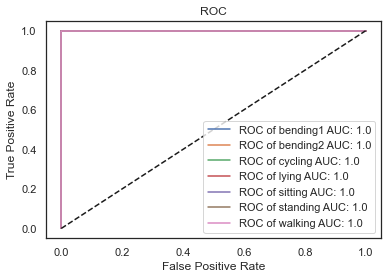

In [32]:
# Fit regularized Multinomial Naive Bayes model
MultinomialModel = MultinomialNB()
MultinomialModel_test = MultinomialModel.fit(X_scale_test_2,y9)

# predict probabilities
y_label3 = MultinomialModel_test.predict(X_scale_test_2) 
y_hat3 = MultinomialModel_test.predict_proba(X_scale_test_2)

fpr = {}
tpr = {}
multiclassAUC = {}

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_label3))[:,i], y_hat3[:,i])
    multiclassAUC[i] = roc_auc_score(np.array(pd.get_dummies(y_label3))[:,i], y_hat3[:,i])

    
label_name = ['bending1','bending2','cycling','lying','sitting','standing','walking']

for i in range(7):
    className = label_name[i]
    label = 'ROC of ' + className + ' AUC: ' + str(multiclassAUC[i])
    plt.plot(fpr[i], tpr[i], label=label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [33]:
pd.crosstab(y9,y_label3)

col_0,0,1,2,3,4,5,6
label,,,,,,,
0,2,0,0,0,0,0,0
1,0,2,0,0,0,0,0
2,0,0,3,0,0,0,0
3,0,0,0,3,0,0,0
4,0,0,0,0,3,0,0
5,0,0,0,0,0,3,0
6,0,0,0,0,0,0,3


**The Test error is 0**

### Multi-Class Classification using Gaussian Naive Bayes Classifier

In [34]:
Gaussianaccuracy = []
for l in range(1,21):  
    # load the datasets
    dataset9 = get_feature_break_1(train_set, l)
    dataset9 = label_train(dataset9)
    
    # Label Encoding
    LE=LabelEncoder().fit(dataset9['label'])
    dataset9['label']=LE.transform(dataset9['label'])

    # Data Scaling
    X10 = dataset9.iloc[: , :-1]
    scaler.fit(X10)
    X_scale_3 = scaler.transform(X10)
    y10 = dataset9.label
    # Fit gaussian naive bayes classifier
    gaussianModel = GaussianNB()
    gaussianModel = gaussianModel.fit(X_scale_3,y10)
    gaussianyhat = gaussianModel.predict(X_scale_3)

    # Cross-validation accuracy
    GaussianValidationAccuracy = gaussianModel.score(X_scale_3, y10)
    Gaussianaccuracy.append(GaussianValidationAccuracy)

In [35]:
l = list(range(1,21))
result_table_4 = pd.DataFrame(list(zip(l, Gaussianaccuracy)), 
                               columns=['l','Gaussian_Accuracy_scores'])
result_table_4

,l,Gaussian_Accuracy_scores
0,1,0.971014
1,2,1.000000
2,3,0.971014
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,0.985507


**select l = 4,  Gaussian_Accuracy_Scores = 1  as the best train model to run test set**

In [36]:
# load the datasets and label-encoding y 
dataset10 = get_feature_break_2(test_set, 4)
dataset10 = label_test(dataset10)
LE=LabelEncoder().fit(dataset10['label'])
dataset10['label']=LE.transform(dataset10['label'])

# Data Scaling
X11 = dataset10.iloc[: , :-1]
scaler.fit(X11)
X_scale_test_3 = scaler.transform(X11)
y11 = dataset10.label

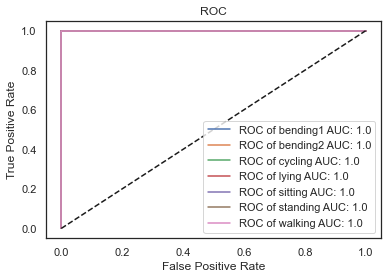

In [37]:
# Fit regularized Gaussian Naive Bayes model
gaussianModel = GaussianNB()
gaussianModel_test = gaussianModel.fit(X_scale_test_3,y11)

# predict probabilities
y_label4 = gaussianModel_test.predict(X_scale_test_3) 
y_hat4 = gaussianModel_test.predict_proba(X_scale_test_3)

fpr = {}
tpr = {}
multiclassAUC = {}

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_label4))[:,i], y_hat4[:,i])
    multiclassAUC[i] = roc_auc_score(np.array(pd.get_dummies(y_label4))[:,i], y_hat4[:,i])

    
label_name = ['bending1','bending2','cycling','lying','sitting','standing','walking']

for i in range(7):
    className = label_name[i]
    label = 'ROC of ' + className + ' AUC: ' + str(multiclassAUC[i])
    plt.plot(fpr[i], tpr[i], label=label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [38]:
pd.crosstab(y11,y_label4)

col_0,0,1,2,3,4,5,6
label,,,,,,,
0,2,0,0,0,0,0,0
1,0,2,0,0,0,0,0
2,0,0,3,0,0,0,0
3,0,0,0,3,0,0,0
4,0,0,0,0,3,0,0
5,0,0,0,0,0,3,0
6,0,0,0,0,0,0,3


**The Test error is 0**

### (C)-(iii) Which method is better for multi-class classification in this problem?

On average, Gaussian Naive Bayes classifier is perform better for multi-class classification in this problem, the AUC and Test Error are both better than Multinomial Naive Bayes Classifier and Multiclass Logistic Regression.